Test cases from this list are prepended with "A" - Other notebooks specifying additional tests should prepend with "B", "C", "D", etc

Basic
1. ALA_ALA (cterm cap/nterm cap/charged terms)
2. ALA_ALA (uncapped)
3. HIS_PRO (diff protonation states)
4. CYX_ALA_ALA_CYX
5. ALA_ASP/ASH
6. ALA_LYS/LYN
7. ALA_ALA LIG
8. ALA ALA (one/two chains, one/two molecules, maybe TER between)
9. ALA ALA (differ only by insertion code)
10. ALA ALA (same residue info, noncontiguous)
11. Deprotonated SER and CYX
12. Chelated metal
13. D amino acids (not clear if we should check stereo?)
14. phosphotyrosine (TPO)


Harder
1. ALA_ALA LIG
2. covalent ligand
3. AMBER residue names

Scoring metric
* Same canonical isomeric SMILES
     * Each test should have a "PDB" input and a "reference" input for comparison. 
     * If the reference input is a SMILES doesn't need to be canonicalized
* PDB files MAY have CONECT lines. If so, the test will be run twice, with one run stripping that input
* Ligands will always be called HETATM

# Test case generation
A1

In [11]:
import os 
from rdkit import Chem
from rdkit.Chem import AllChem 

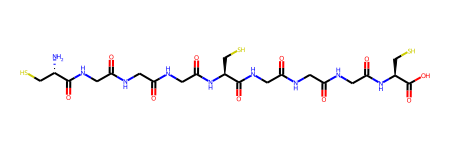

In [14]:
mol = Chem.MolFromFASTA('CGGGCGGGC')
mol

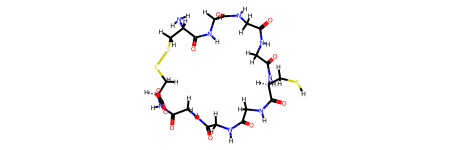

In [15]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    "([S:1].[S:2])>>[S:1]-[S:2]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
Chem.SanitizeMol(product)

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())

Chem.MolToPDBFile(product, "A4/A4_disulfide_1.pdb")
Chem.MolToMolFile(product, "A4/A4_disulfide_reference_1.mol")

product = products[1][0]
Chem.SanitizeMol(product)

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())

Chem.MolToPDBFile(product, "A4/A4_disulfide_2.pdb")
Chem.MolToMolFile(product, "A4/A4_disulfide_reference_2.mol")
product

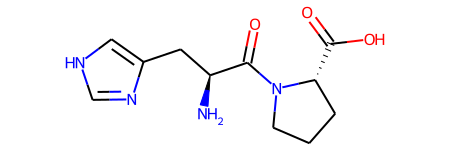

In [12]:
mol = Chem.MolFromFASTA('HP')
mol

In [26]:
reactions = [
    "[C:1]c1nc[nH]c1>>[C:1]c1[nH]cnc1",
    "[C:1]c1nc[nH]c1>>[C:1]c1nc[nH]c1",
    "[C:1]c1nc[nH]c1>>[C:1]c1[nH]c[nH+]c1",
    "[C:1]c1nc[nH]c1>>[C:1]c1[nH+]c[nH]c1",
]
for i,r in enumerate(reactions):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(
       r
    )
    products = rxn.RunReactants([mol])

    product = products[0][0]
    Chem.SanitizeMol(product)
    
    for a1, a2 in zip(mol.GetAtoms(), product.GetAtoms()):
        if a2.GetPDBResidueInfo() is None:
            a2.SetMonomerInfo(a1.GetPDBResidueInfo())

    product = Chem.AddHs(product, addResidueInfo=True)
    AllChem.EmbedMolecule(product, AllChem.ETKDG())
    Chem.MolToPDBFile(product, f"A3/A3_HIS_protonation_{i}.pdb")
    Chem.MolToMolFile(product, f"A3/A3_HIS_protonation_reference_{i}.mol")


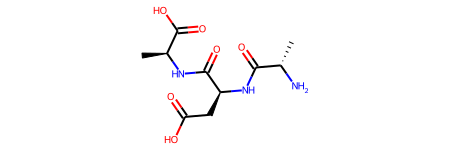

In [41]:
mol = Chem.MolFromFASTA('ADA')
mol

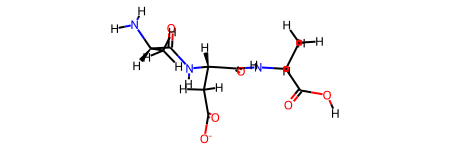

In [42]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    "[C:1]CC(=O)O>>[C:1]CC(=O)[O-]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
Chem.SanitizeMol(product)

for a1, a2 in zip(mol.GetAtoms(), product.GetAtoms()):
    if a2.GetPDBResidueInfo() is None:
        a2.SetMonomerInfo(a1.GetPDBResidueInfo())

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())

Chem.MolToPDBFile(product, "A5/A5_ASH_1.pdb")
Chem.MolToMolFile(product, "A5/A5_ASH_reference_1.mol")
product


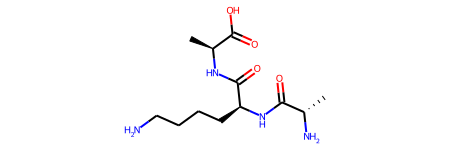

In [43]:
mol = Chem.MolFromFASTA('AKA')
mol

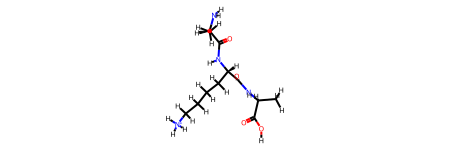

In [44]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    "[C;D2:1][NH2]>>[C;D2:1][NH3+]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
Chem.SanitizeMol(product)

for a1, a2 in zip(mol.GetAtoms(), product.GetAtoms()):
    if a2.GetPDBResidueInfo() is None:
        a2.SetMonomerInfo(a1.GetPDBResidueInfo())

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())

Chem.MolToPDBFile(product, "A6/A6_LYN_1.pdb")
Chem.MolToMolFile(product, "A6/A6_LYN_reference_1.mol")
product
